In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import numpy as np
%config InlineBackend.figure_format = 'svg'

from matplotlib import rcParams
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
#rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "12"
rcParams['figure.figsize'] = 8, 8



In [56]:
number_of_monomers = 100
monomer_length = 1.

def get_polymer_shape(nm, am):
    thetas = (2*np.pi) * np.random.rand(nm)
    dx = am * np.cos(thetas)
    dy = am * np.sin(thetas)
    x = np.add.accumulate(dx)
    y = np.add.accumulate(dy)
    return((x,y))


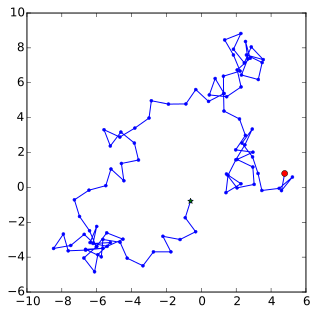

In [58]:
(x,y)=get_polymer_shape(number_of_monomers, monomer_length)

rcParams['figure.figsize'] = 5, 5

plt.plot(x,y,'.-')
plt.plot([x[0]],[y[0]],'*')
plt.plot([x[-1]],[y[-1]],'o')
plt.axis('equal')

plt.savefig("polymer_shape.svg")


In [59]:
def ensemble_stat(n, nm, am):
    xa=np.zeros(n)
    ya=np.zeros(n)
    la=np.zeros(n)
    for i in range(n):
        (x,y)=get_polymer_shape(nm, am)
        (xa[i],ya[i])=(x[-1],y[-1])
        la[i]=np.sqrt(xa[i]**2+ya[i]**2)
    return(xa,ya,la)

# number of polymer configurations
n = 1000

(xa,ya,la) = ensemble_stat(n, number_of_monomers, monomer_length)

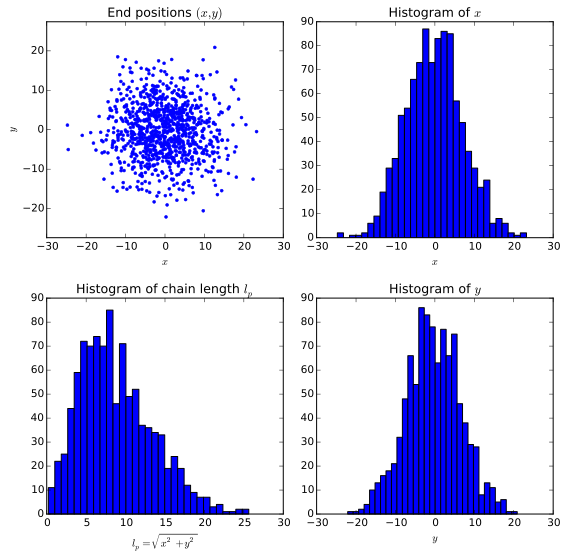

In [60]:
rcParams["font.size"] = "10.5"
rcParams['figure.figsize'] = 8, 8

plt.subplot(2,2,1)
plt.plot(xa,ya,'.')
plt.axis('equal')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("End positions $(x,y)$")

plt.subplot(2,2,2)
plt.hist(xa, np.sqrt(n))
plt.xlabel("$x$")
plt.title("Histogram of $x$")

plt.subplot(2,2,4)
plt.hist(ya, np.sqrt(n))
plt.xlabel("$y$")
plt.title("Histogram of $y$")

plt.subplot(2,2,3)
plt.hist(la, np.sqrt(n))
plt.xlabel("$l_p = \sqrt{x^2+y^2}$")
plt.title("Histogram of chain length $l_p$")

plt.tight_layout()


plt.savefig("polymer_stats.svg")



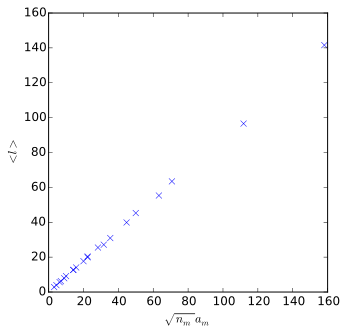

In [62]:
rcParams["font.size"] = "12"
rcParams['figure.figsize'] = 5, 5


for n_m in [10,20,50,100,200,500,1000]:
    for a_m in [1,2,5]:
        #print("Calculating %i, %i", n_m, a_m)
        (xa,ya,la) = ensemble_stat(n, n_m, a_m)
        plt.plot([np.sqrt(n_m)*a_m], [np.mean(la)], 'bx')
plt.xlabel("$\sqrt{n_m} a_m$")
plt.ylabel("$< l >$")
        
plt.savefig("length_vs_mon_number.pdf")

